In [1]:
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from theano import tensor as tt
import scipy.stats as st
import seaborn as sns
import scipy
import import_ipynb
import GP_util #load module first
import importlib
importlib.reload(GP_util) # reload full module
from GP_util import unique, select, distancematrix,linear_pixel
#import methods from reloaded module

/home/brian/anaconda2/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


importing Jupyter notebook from GP_util.ipynb
importing Jupyter notebook from GP_util.ipynb


In [2]:
datapath = '/home/brian/WesternWheat/Data/Processed/maxdf_24.csv'
df = pd.read_csv(datapath)

df = select(df, n=200) # selects subset of df for time/memory reductions
f, df_unique, zero_farm_idx, Num_farms = unique(df)

there are 192 unique farms in loaded df


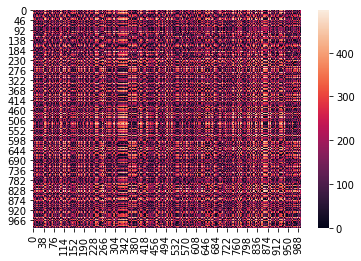

In [156]:
def elevation_distance(elevation):
    e = elevation[:,None]
    return np.fabs(e-e.T)

elevation = np.random.randint(750,1250,1000)
ed = elevation_distance(elevation)

In [216]:
def geodesic(df, distance_calc=True):
    """
    inputs: df

    returns:
    1.) distance between all farms in miles
    2.) distance^2

    """

    from timeit import default_timer as timer
    start = timer()
    from scipy.spatial import distance_matrix
    from geopy.distance import geodesic
    unique_farms = pd.unique(df.pixel)
    distance = np.zeros((unique_farms.size,unique_farms.size))
    df_unique = df.set_index('pixel')
    df_unique = df_unique[~df_unique.index.duplicated(keep='first')] # only keep unique index values

    for i in range(unique_farms.size):
        lat_lon_i = df_unique.Latitude.iloc[i],df_unique.Longitude.iloc[i]
        for j in range(i):
         
            lat_lon_j = df_unique.Latitude.iloc[j],df_unique.Longitude.iloc[j]
            if distance_calc == True:
                distance[i,j] = geodesic(lat_lon_i, lat_lon_j).miles
                distance[j,i] = distance[i,j] # make use of symmetry
                end = timer()
    print(round((end - start),3))
    return distance, np.power(distance, 2)

distance, Dmatsq = fastdistancematrix(df)

3.836


In [21]:
d,dmatsq = distancematrix(df)

In [55]:
# fast version does indeed work
#np.where(result == distance[1].size, Num_farms**2
np.isclose(result[0],distance[0],atol=10).sum(), Num_farms

(161, 192)

In [236]:
import numpy as np

def Haversine(v):
    """
    distance between two lat,lon coordinates 
    using the Haversine formula. Assumes one
    radius. 3,950 to 3,963 mi 
    """
    from timeit import default_timer as timer
    start = timer()
    R = 3958 # radius at 40 deg 750 m elev
    v = np.radians(v)
    
    dlat = v[:, 0, np.newaxis] - v[:, 0]
    dlon = v[:, 1, np.newaxis] - v[:, 1]
    c = np.cos(v[:,0,None])

    a = np.sin(dlat / 2.0) ** 2 + c @ c.T * np.sin(dlon / 2.0) ** 2

    c = 2 * np.arcsin(np.sqrt(a))
    distance_mat = R * c
    print(round((timer() - start),3))
    return distance_mat

result = Haversine(df_unique[['Latitude','Longitude']].values)




0.01


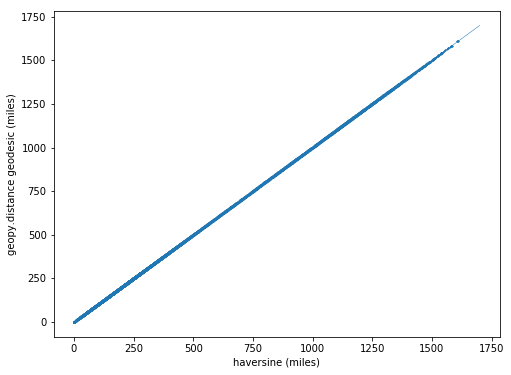

In [237]:
plt.figure(figsize=(8,6))
plt.scatter(result.ravel(),distance.ravel(),s=.5)

#plt.scatter(result[1],distance[1],s=1)
plt.plot([0,1700],[0,1700], linewidth=.5)
plt.xlabel('haversine (miles)')
plt.ylabel('geopy.distance geodesic (miles)');

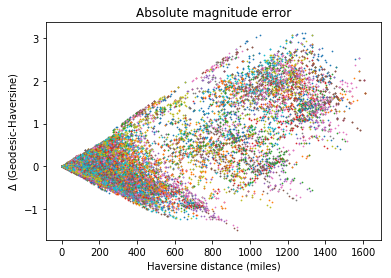

In [238]:
for i in range(100):
    plt.scatter(result[i],distance[i]-result[i],s=.5)
plt.ylabel('$\Delta$ (Geodesic-Haversine)')
plt.xlabel('Haversine distance (miles)')
plt.title('Absolute magnitude error');


Text(0.5, 1.0, 'relative error')

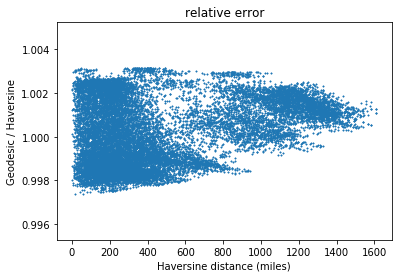

In [230]:
plt.scatter(result.ravel(),distance.ravel() /result.ravel(),s=.5)
plt.ylabel('Geodesic / Haversine')
plt.xlabel('Haversine distance (miles)')
plt.title('relative error')

0.0


Text(0.5, 1.0, 'all points in distance matrix')

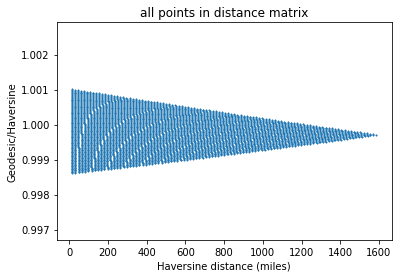

In [234]:
import numpy as np
lat = np.linspace(30,50,100)
lon = np.linspace(125,110,100)

data = pd.DataFrame({'Latitude':lat,'Longitude':lon})




def Haversine(v):
    """
    distance between two lat,lon coordinates 
    using the Haversine formula. Assumes one
    radius. r = 3,950 to 3,963 mi 
    """
    from timeit import default_timer as timer
    start = timer()
    R = 3958 # radius at 40 deg 750 m elev
    v = np.radians(v)
    
    dlat = v[:, 0, np.newaxis] - v[:, 0]
    dlon = v[:, 1, np.newaxis] - v[:, 1]
    c = np.cos(v[:,0,None])

    a = np.sin(dlat / 2.0) ** 2 + c @ c.T * np.sin(dlon / 2.0) ** 2

    c = 2 * np.arcsin(np.sqrt(a))
    result = R * c
    print(round((timer() - start),3))
    return result



def geodesicdistancematrix(data):

    from geopy.distance import geodesic
    distance = np.zeros((data.shape[0],data.shape[0]))
    for i in range(data.shape[0]):
        
        lat_lon_i = data.Latitude.iloc[i],data.Longitude.iloc[i]
        
        for j in range(i):
            
            lat_lon_j = data.Latitude.iloc[j],data.Longitude.iloc[j]
            
            distance[i,j] = geodesic(lat_lon_i, lat_lon_j).miles
            distance[j,i] = distance[i,j] # make use of symmetry

    return distance

distanceG = slowdistancematrix(data)
distanceH = Haversine(data.values)



plt.scatter(distanceH.ravel(),distanceG.ravel()/distanceH.ravel(),s=.5)
plt.ylabel('Geodesic/Haversine')
plt.xlabel('Haversine distance (miles)')
plt.title('all points in distance matrix')

(100, 1)

(100, 100)

(100, 100)